# Tutorial

## Import modules

In [1]:
# Import generic modules
import matplotlib
import networkx as nx
import pandas as pd
import seaborn

In [2]:
# Import the platform_analysis libraries
import platform_analysis.github_analysis as github
import platform_analysis.sna as sna

In [3]:
# Render our plots inline
%matplotlib inline 

In [4]:
# Clear font cache for matplotlib
font_cache_path = matplotlib.get_cachedir() + '/fontList.cache'
%rm $font_cache_path
# Set the font
matplotlib.rcParams.update({'font.family': 'Hack'})

## Get and save the data

In [5]:
# Configuration
repository="fablabs"
username="fablabbcn"
userlogin = "xxxx"
password = "xxxx"

In [6]:
# Get the data from GitHub
repo = github.github_analysis(
    repository=repository,
    username=username,
    userlogin=userlogin,
    password=password,
    path="/Users/xxxx/Documents")

In [7]:
# Load the data, in case we already have it
# repo = nx.read_graphml("fablabs.graphml")

In [8]:
# Save data without self-loops
sna.save_graph(repo, "fablabs.graphml", self_loops=False)

In [9]:
# Remove self-loops (a user interacting with herself/himself)
self_loops_edges = repo.selfloop_edges(keys=True, data=True)
repo.remove_edges_from(self_loops_edges)

In [10]:
# Transform the graph data into pandas time series
data = sna.graph_to_pandas_time_series(repo)

In [11]:
data.head()

,0,1,node,msg,type,endopen,start,value
0,fablabbcn,<github.NamedUser.NamedUser object at 0x110282...,92929804,[API] fix travis ruby 2.2.2,pull request assignee,2016-01-01,2016-11-09 09:34:51,1
1,fablabbcn,<github.NamedUser.NamedUser object at 0x1109ce...,92931798,[API] fix travis rake db,pull request assignee,2016-01-01,2016-11-09 09:48:24,1
2,fablabbcn,fablabbcn/fablabs,None,None,repository creation,2016-01-01,2013-10-16 20:04:34,1
3,Lomascolo,fablabbcn,5,Lomascolo/fablabs,fork,2016-01-01,2016-05-20 13:00:58,1
4,annawb,fablabbcn,1,annawb/fablabs,fork,2016-01-01,2016-12-19 04:20:44,1


In [12]:
# Do a first time series analysis
time_data = sna.time_analysis(data=data, focus="global", interaction="0", structure="separated")

In [13]:
time_data.head()

,commit,issue comment,issue assignation,fork,merged pull request,pull request assignee,repository creation
2016-12-03 16:07:20,0,1,0,0,0,0,0
2016-11-09 09:34:51,0,0,0,0,0,1,0
2016-11-09 09:48:24,0,0,0,0,0,1,0
2013-10-16 20:04:34,0,0,0,0,0,0,1
2016-05-20 13:00:58,0,0,0,1,0,0,0


## All users - Graph visualization

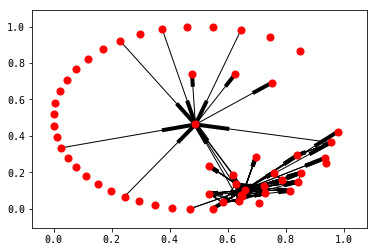

In [14]:
# Plot the global graph, for all users
pos=nx.spring_layout(repo,iterations=100)
nx.draw_networkx(repo,pos,node_size=50,with_labels=False)

## All users - Time visualization

In [15]:
# Group interactions by type
global_stats = sna.type_stats(data=time_data, focus="global")

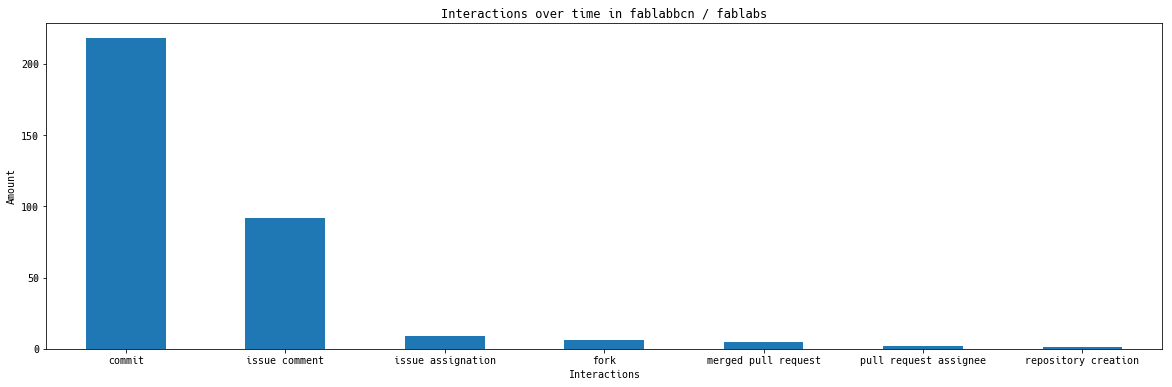

In [16]:
# Plot generic stats of interaction types
plot = global_stats.plot(kind="bar", figsize=(20,6), title="Interactions over time in "+username+" / "+repository)
plot.set_xlabel("Interactions")
plot.set_ylabel("Amount")
plot.set_xticklabels(global_stats.index, rotation=0)
matplotlib.pyplot.savefig("results-01.pdf")

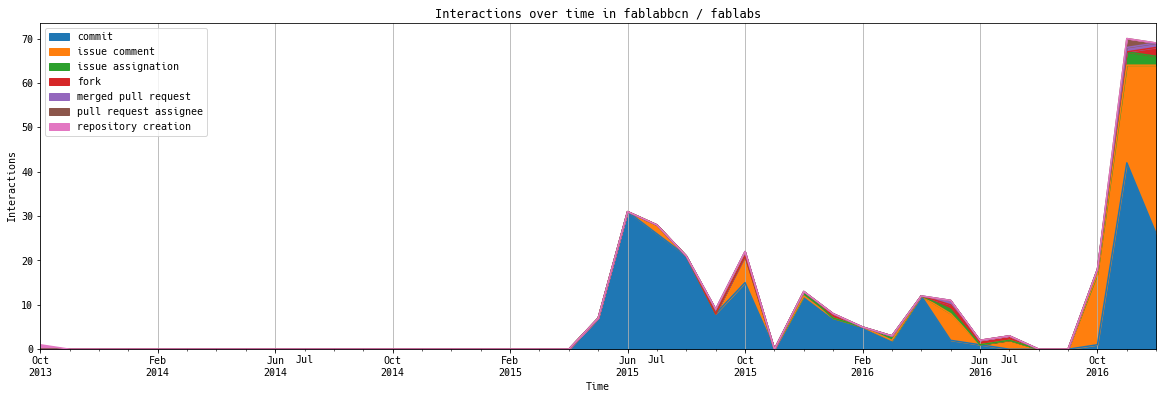

In [17]:
# Plot interactions over time, by type (monthly resample)
plot = time_data.resample('M').sum().plot(kind="area", figsize=(20,6), title="Interactions over time in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
matplotlib.pyplot.savefig("results-02.pdf")

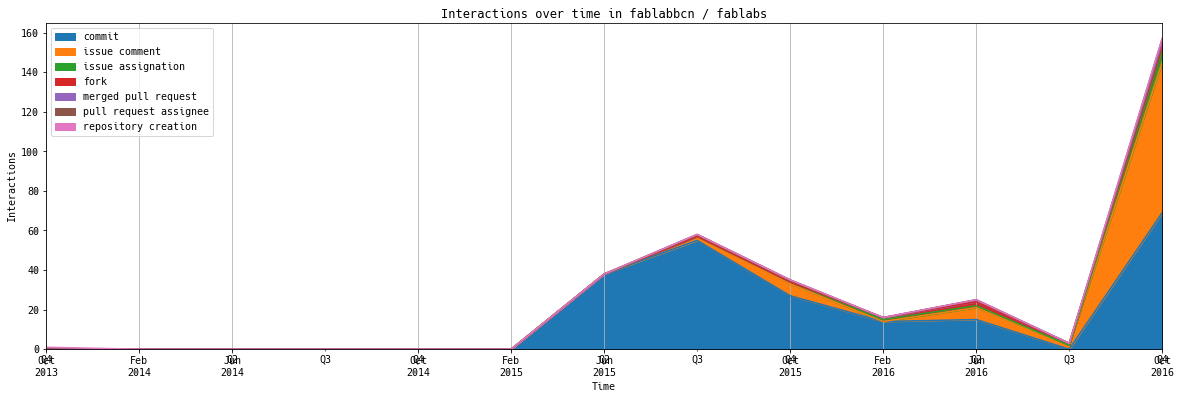

In [18]:
# Plot interactions over time, by type (quarterly resample)
plot = time_data.resample('Q').sum().plot(kind="area", figsize=(20,6), title="Interactions over time in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
# Plot interactions over time, by type (yearly resample)
matplotlib.pyplot.savefig("results-03.pdf")

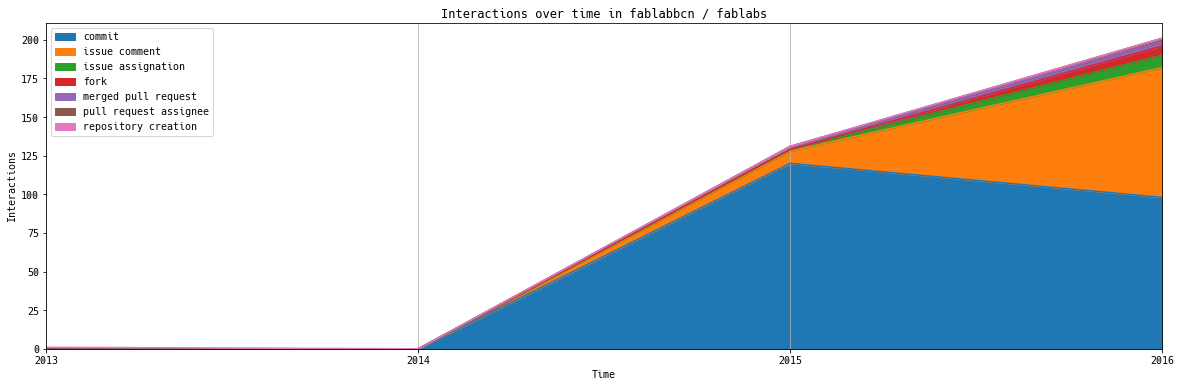

In [19]:
# Plot interactions over time, by type (yearly resample)
plot = time_data.resample('A').sum().plot(kind="area", figsize=(20,6), title="Interactions over time in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='12M')
plot.set_xticklabels([x.strftime('%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
matplotlib.pyplot.savefig("results-04.pdf")

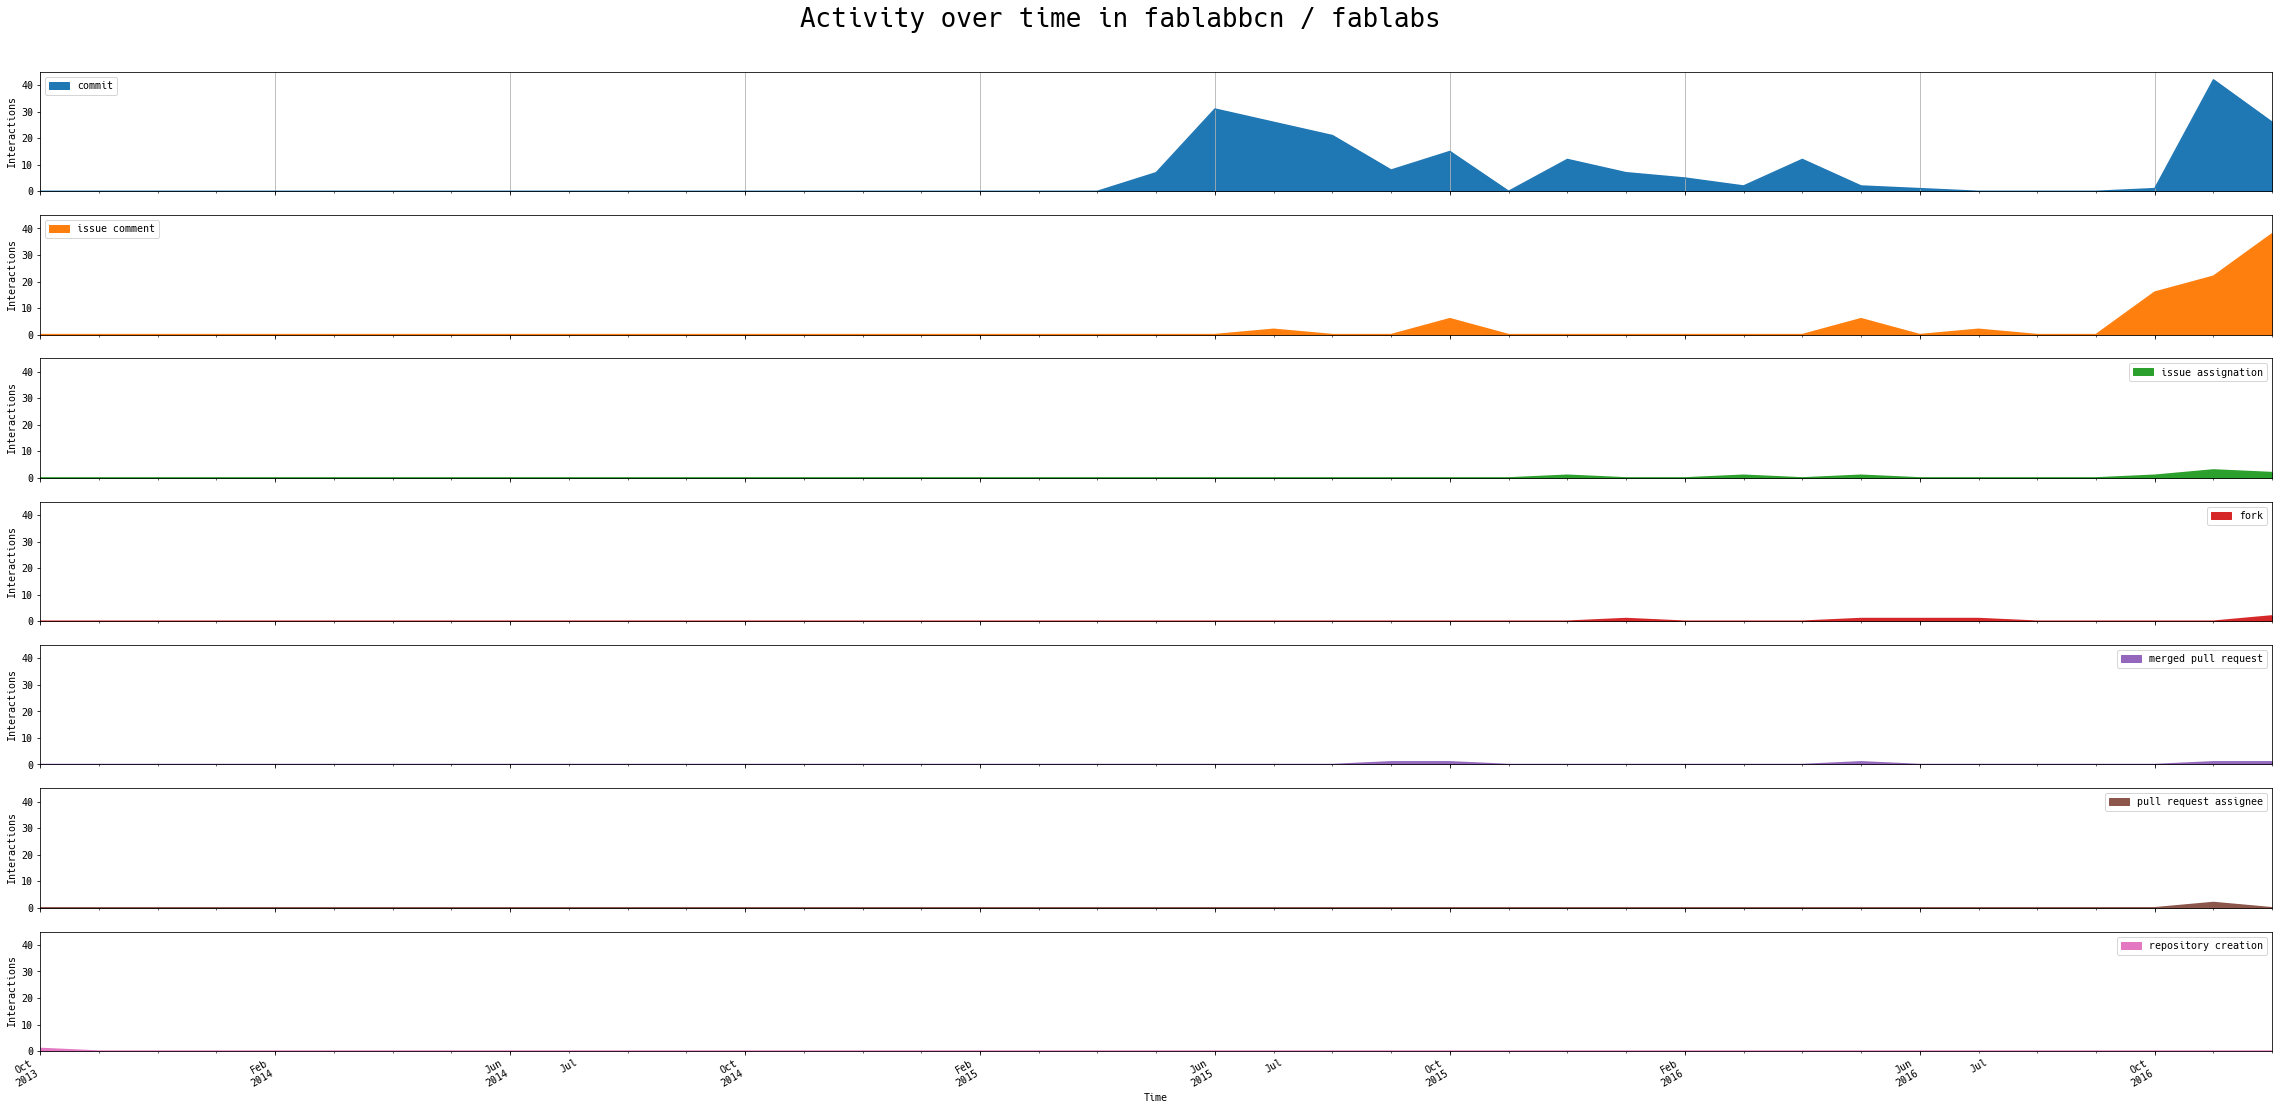

In [20]:
# Plot interactions over time, split by type (monthly resample)
plot = time_data.resample('M').sum().plot(label=("X", "Y"), subplots=True, legend=True, kind="area", sharex=True, sharey=True, ylim=(0, 150), figsize=(40,20))

ax = plot.flatten()
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')

for i in plot:
    i.set_ylabel("Interactions")
    i.set_xlabel("Time")
    ax[0].set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
    ax[0].set_xticks(xticks)
    ax[0].grid('on', which='major', axis='x')
    i.set_ylim(0,45)

matplotlib.pyplot.suptitle("Activity over time in "+username+" / "+repository, size=26, y=0.925)
matplotlib.pyplot.savefig("results-05.pdf")

In [21]:
# Combine all the interactions together
time_data_combined = sna.time_analysis(data=data, focus="global", interaction="0", structure="combined")

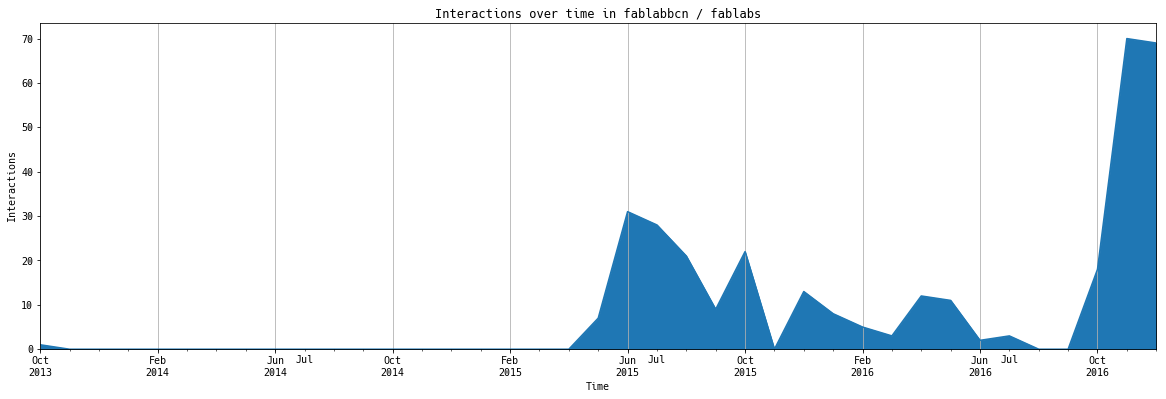

In [22]:
# Plot interactions over time (monthly resample)
plot = time_data_combined.resample('M').sum().plot(kind="area", figsize=(20,6), title="Interactions over time in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
matplotlib.pyplot.savefig("results-06.pdf")

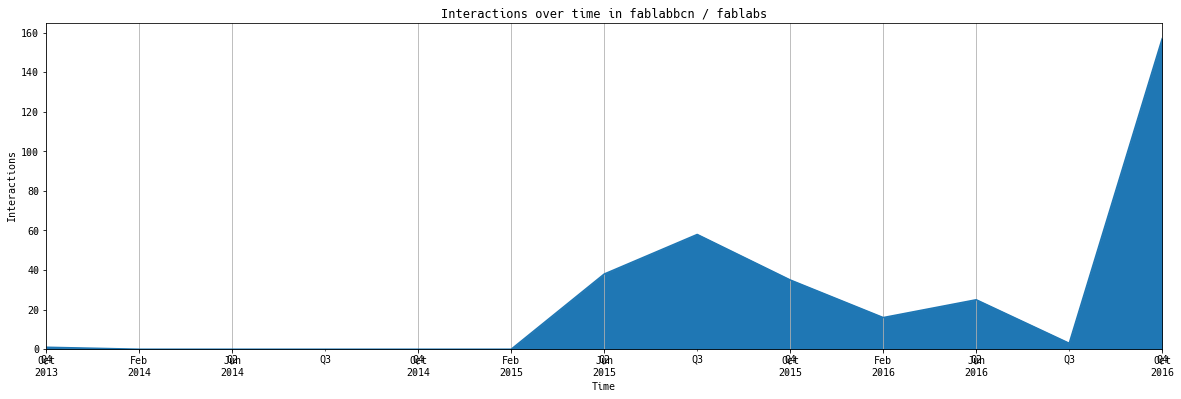

In [23]:
# Plot interactions over time (quarterly resample)
plot = time_data_combined.resample('Q').sum().plot(kind="area", figsize=(20,6), title="Interactions over time in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
matplotlib.pyplot.savefig("results-07.pdf")

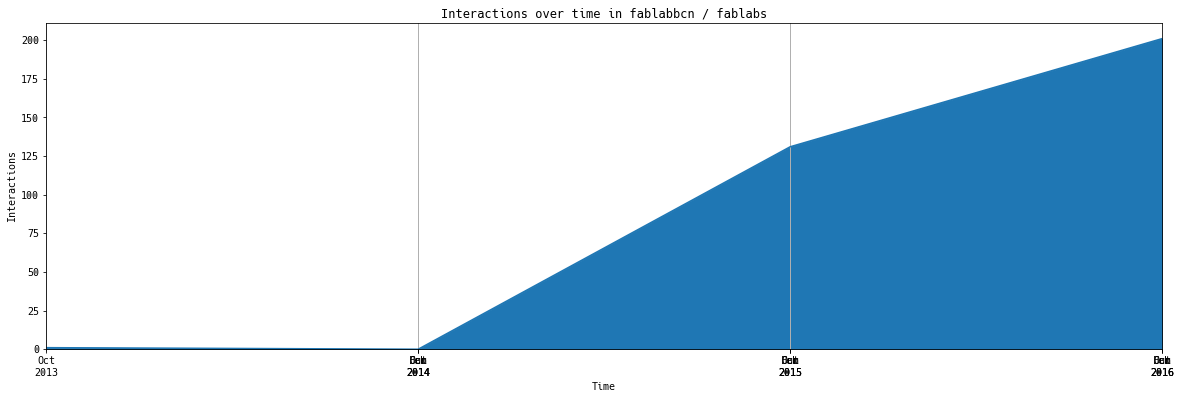

In [24]:
# Plot interactions over time (yearly resample)
plot = time_data_combined.resample('A').sum().plot(kind="area", figsize=(20,6), title="Interactions over time in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
matplotlib.pyplot.savefig("results-08.pdf")

## Single users - Data visualisation

In [25]:
# Get data of single users
user_data = sna.time_analysis(data=data, focus="user", interaction="0", structure="separated")

In [26]:
user_data.head()

commit issue comment issue assignation fork  \
nnnnicholas 2016-12-03 16:07:20      0             1                 0    0   
fablabbcn   2016-11-09 09:34:51      0             0                 0    0   
            2016-11-09 09:48:24      0             0                 0    0   
            2013-10-16 20:04:34      0             0                 0    0   
Lomascolo   2016-05-20 13:00:58      0             0                 0    1   

                                merged pull request pull request assignee  \
nnnnicholas 2016-12-03 16:07:20                   0                     0   
fablabbcn   2016-11-09 09:34:51                   0                     1   
            2016-11-09 09:48:24                   0                     1   
            2013-10-16 20:04:34                   0                     0   
Lomascolo   2016-05-20 13:00:58                   0                     0   

                                repository creation  
nnnnicholas 2016-12-03 16:07:20                   0  
fablabbcn   2016-11-09 09:34:51                   0  
            2016-11-09 09:48:24                   0  
            2013-10-16 20:04:34                   1  
Lomascolo   2016-05-20 13:00:58                   0

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


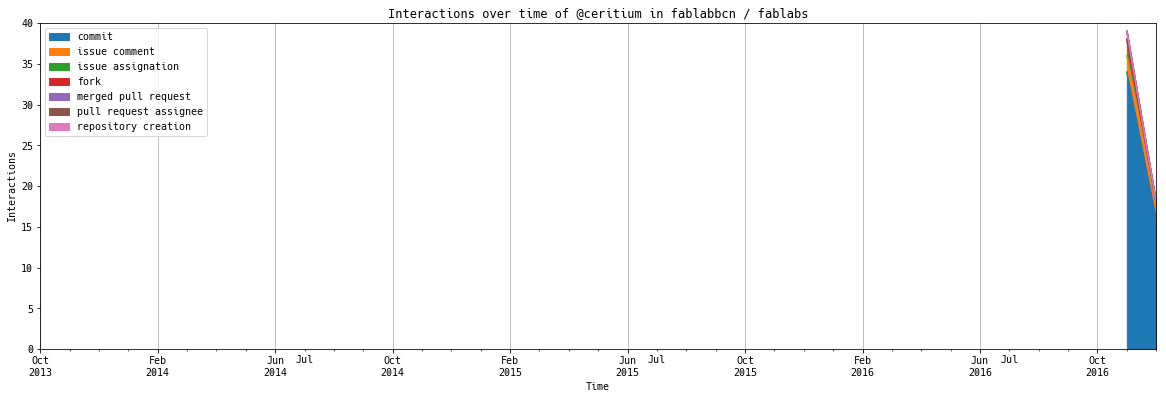

In [27]:
# Plot interactions of @ceritium user over time, by type (monthly resample)
plot = user_data.ix["ceritium"].resample('M').sum().plot(kind="area", figsize=(20,6), ylim=(0,40), title="Interactions over time of @ceritium in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
matplotlib.pyplot.savefig("results-09.pdf")

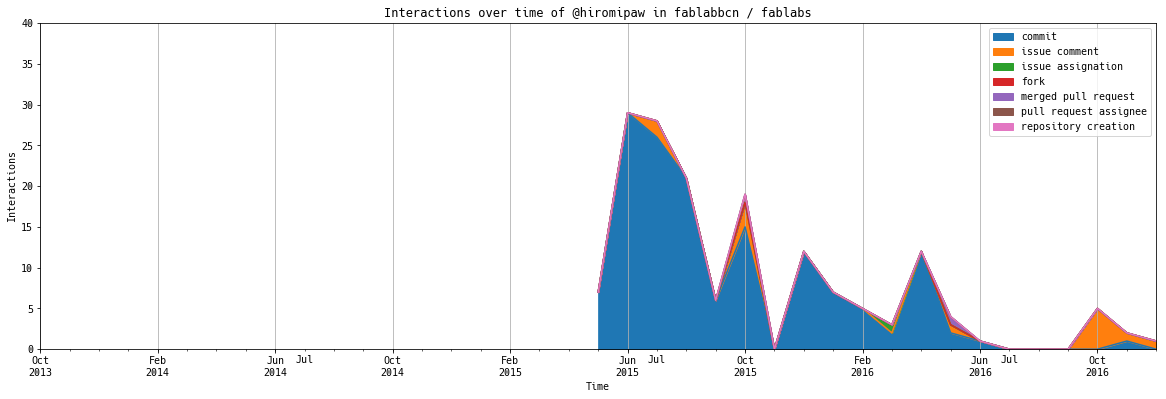

In [28]:
# Plot interactions of @hiromipaw user over time, by type (monthly resample)
plot = user_data.ix["hiromipaw"].resample('M').sum().plot(kind="area", ylim=(0,40), figsize=(20,6), title="Interactions over time of @hiromipaw in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
matplotlib.pyplot.savefig("results-10.pdf")

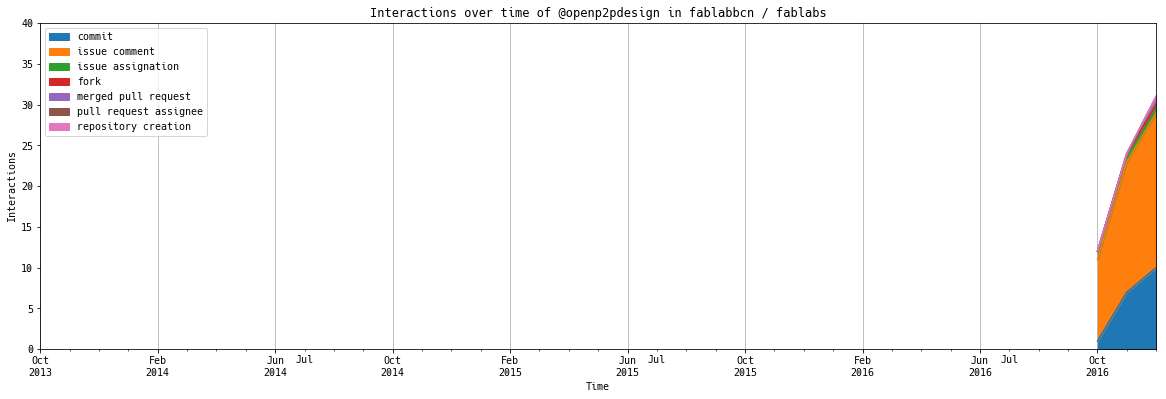

In [29]:
# Plot interactions of @openp2pdesign user over time, by type (monthly resample)
plot = user_data.ix["openp2pdesign"].resample('M').sum().plot(kind="area", ylim=(0,40), figsize=(20,6), title="Interactions over time of @openp2pdesign in "+username+" / "+repository)
# Axes
plot.set_xlabel("Time")
plot.set_ylabel("Interactions")
# Time format for x axis
xticks = pd.date_range(start=time_data.index.min(), end=time_data.index.max(), freq='4M')
plot.set_xticklabels([x.strftime('%h\n%Y') for x in xticks]);
plot.set_xticks(xticks)
plot.grid('on', which='major', axis='x')
matplotlib.pyplot.savefig("results-11.pdf")

In [30]:
# Check @openp2pdesign data table (only first rows)
user_data.ix["openp2pdesign"].head()

,commit,issue comment,issue assignation,fork,merged pull request,pull request assignee,repository creation
2016-12-06 17:50:49,1,0,0,0,0,0,0
2016-12-14 17:22:06,0,0,1,0,0,0,0
2016-11-04 16:44:09,0,0,1,0,0,0,0
2016-12-21 17:19:21,0,1,0,0,0,0,0
2016-11-26 16:48:51,0,1,0,0,0,0,0


In [31]:
# Check @openp2pdesign stats data table
user_data.ix["openp2pdesign"].describe()

,commit,issue comment,issue assignation,fork,merged pull request,pull request assignee,repository creation
count,67,67,67,67,67,67,67
unique,2,2,2,1,2,1,1
top,0,1,0,0,0,0,0
freq,49,45,64,67,66,67,67


In [32]:
# All users stats
user_data.describe()

,commit,issue comment,issue assignation,fork,merged pull request,pull request assignee,repository creation
count,332,332,332,332,332,332,332
unique,2,2,2,2,2,2,2
top,1,0,0,0,0,0,0
freq,218,240,323,326,327,330,331


In [33]:
# All users data
user_data

commit issue comment issue assignation  \
nnnnicholas     2016-12-03 16:07:20      0             1                 0   
fablabbcn       2016-11-09 09:34:51      0             0                 0   
                2016-11-09 09:48:24      0             0                 0   
                2013-10-16 20:04:34      0             0                 0   
Lomascolo       2016-05-20 13:00:58      0             0                 0   
fablab-catania  2016-12-19 13:48:57      0             0                 0   
Aldo23          2016-12-21 11:37:34      0             1                 0   
Fablabimpact    2016-06-01 19:35:17      0             0                 0   
                2016-07-26 13:26:07      0             1                 0   
pral2a          2015-09-28 16:18:35      0             0                 0   
                2015-09-28 18:17:29      1             0                 0   
                2015-12-14 14:30:34      0             0                 1   
lespacedunmatin 2016-05-31 09:57:03      0             1                 0   
annawb          2016-12-19 04:20:44      0             0                 0   
tomasdiez       2015-10-08 10:15:57      0             1                 0   
                2015-10-08 10:46:34      0             1                 0   
                2015-10-08 10:13:37      0             1                 0   
Hiromi          2015-09-07 17:03:12      1             0                 0   
                2015-06-08 15:48:12      1             0                 0   
                2015-06-08 15:41:36      1             0                 0   
wendwarge       2016-12-21 22:56:02      0             1                 0   
                2016-12-22 00:23:25      0             1                 0   
                2016-12-22 00:36:23      0             1                 0   
                2016-12-22 02:30:51      0             1                 0   
                2016-05-25 02:03:03      0             1                 0   
waagsociety     2016-01-15 09:03:53      0             0                 0   
TheBeachLab     2016-12-03 05:40:17      0             0                 1   
                2016-12-03 13:01:23      0             1                 0   
                2016-12-05 05:06:57      0             1                 0   
                2016-11-15 11:03:34      0             1                 0   
...                                    ...           ...               ...   
openp2pdesign   2016-12-14 17:14:41      1             0                 0   
                2016-11-16 10:53:06      1             0                 0   
                2016-10-27 15:00:39      0             1                 0   
                2016-10-26 15:43:20      0             1                 0   
                2016-10-27 14:37:14      0             1                 0   
                2016-10-25 13:07:22      0             0                 1   
                2016-12-14 16:16:15      0             0                 0   
                2016-10-28 08:23:59      0             1                 0   
                2016-12-06 18:48:18      1             0                 0   
                2016-10-27 17:27:44      1             0                 0   
                2016-11-21 19:39:42      1             0                 0   
                2016-12-14 11:38:18      1             0                 0   
                2016-11-22 09:02:49      1             0                 0   
                2016-11-21 19:31:22      1             0                 0   
                2016-12-14 15:47:58      0             1                 0   
                2016-11-23 16:25:29      0             1                 0   
                2016-12-14 15:34:22      0             1                 0   
                2016-10-28 08:05:47      0             1                 0   
                2016-12-15 17:56:20      0             1                 0   
                2016-12-15 11:25:45      0             1  